In [1]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
import math
import matplotlib.pyplot as pl
import random

To plot coherence l1 norm (l1), relative entropy(S) and success probability(P) as a funciton of number of iteration(noi) taking the Grover's operator as G = DO

O = ( I-2|ψ⟩⟨ψ| ) and D = ( 2|ψ1⟩⟨ψ1|-I )

l1 norm of coherence is given by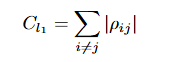

relative entropy is given by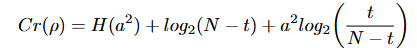 with 

   ;   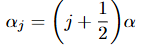   ;   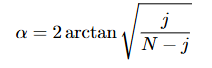   ;   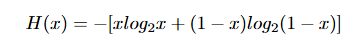   
Success probability is determined by the formula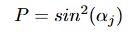
with t = number of target states and j = iteration number

In [21]:
n = 10     #no. of qubits
N = 2**n   #dimension of matrix
t = 4      #no. of target states
length = list(range(n))
noi = 15   #taking same number of iteration for all cases
noi_opt = math.floor(math.sqrt(N/t) * np.pi / 4)   #optimal No of iterations
print("noi = ", noi)
print("Optimal noi = ",noi_opt)

#to set target states by randomly generating them
target = np.zeros(t)    #to store target states
count = 0
flag = 0
i = 0
while(True):
    #to generate a random integer for target position
    a = random.randint(0,N-1)
    
    #checking if that number has already been chosen previously as target state
    for j in range(count):
        if(target[j] == a):
            flag = 1  #value is present in the target array
            
    #to store new value in target array
    if(flag == 0):
        #to store in count position of target array
        target[count] = a
        #updating count (position) value
        count += 1
        #checking for further iteration of while loop
        if(count == t):
            break
print("target = ",target)

phi = [np.pi]    #setting at a particular value
print("phi = ",phi)

x = [complex(np.cos(a), np.sin(a)) for a in phi]
print("x = ",x)

#array to store coherence values after each suboperation in every grover's iteration
l1 = np.zeros(noi)    #to store l1 norm of coherence values after each iteration
S  = np.zeros(noi)    #to store relative entropy values after each iteration
P  = np.zeros(noi)    #to store success probability after each iteration
x_axis = list(range(noi))    #to store iteration number

noi =  15
Optimal noi =  12
target =  [781. 862. 858. 369.]
phi =  [3.141592653589793]
x =  [(-1+1.2246467991473532e-16j)]


In [22]:
def iteration(i,a):
    qc.barrier()
    #count = i*2
    copy_i = i    #storing copy of iteration number
    copy_a = a    #storing copy of phi value
    
    #applying O operator
    qc.append(O_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied O operator to |ψ2⟩", state.draw('latex'))
    
    #Applying D operator
    qc.append(D_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied D operator to |ψ2⟩", state.draw('latex'))
    density_operator = state.to_operator()
    
    #calculating coherence by l1 norm
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ2⟩ = ",coherence)
    l1[copy_i] = coherence
    print("l1 norm = ",coherence)
    
    #calculating coherence by relative entropy
    j = copy_i+1   #to store the actual iteration number 
    alpha = 2*np.arctan(np.sqrt(t/(N-t)))
    alpha_j = (j+1/2.0)*alpha    
    a = np.sin(alpha_j)
    a_2 = a**2
    H = -(a_2*math.log2(a_2)+(1-a_2)*math.log2(1-a_2))
    Cr = H+math.log2(N-j)+a_2*math.log2(j/(N-j))
    S[copy_i] = Cr
    print("relative entropy = ",Cr)
    
    #calculating success probability
    P[copy_i] = np.sin(alpha_j)**2
    
for a in range(len(phi)):
    print("======================================== FOR ϕ = ", phi[a]*180/np.pi,"========================================")
    qc = QuantumCircuit(n)
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("initialised |ψ0⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ0⟩ = ",coherence)

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)

    #defining generalised O Operator
    count = 0
    choice = a
    O_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):   #off diagonal elements
                O_operator.data[i][j] = 0
            else:    #diagonal elements
                flag = 0
                for k in range(t):
                    if(i == target[k]):
                        O_operator.data[i][j] = x[choice]
                        count += 1
                        flag = 1
                        break
                if(flag == 0):
                    O_operator.data[i][j] = 1            
   
    #defining D operator
    D_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i == j):    #for diagonal elements
                D_operator.data[i][j] = 2*density_operator.data[i][j]-1
            else:          #for off-diagonal elements
                D_operator.data[i][j] = 2*density_operator.data[i][j]
    
    #sending out for x iterations of grover's operator
    for i in range(noi):
        print("--------",(i+1)," ITERATION--------")
        iteration(i,a)    #a takes angle phi and i takes noi

======================================== FOR ϕ =  180.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1023.0000000000001
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  1007.0625
l1 norm =  1007.0625
relative entropy =  9.868606213393203
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  960.2422027587892
l1 norm =  960.2422027587892
relative entropy =  9.597470257652965
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  885.4539461046595
l1 norm =  885.4539461046595
relative entropy =  9.16363755797109
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  787.3537372742267
l1 norm =  787.3537372742267
relative entropy =  8.579851837639637
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  672.0488890033957
l1 norm =  672.0488890033957
relative entropy =  7.8730203229339235
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  546.7178037746212
l1 norm =  546.7178037746212
relative entropy =  7.08148829580517
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  419.1630759583107
l1 norm =  419.1630759583107
relative entropy =  6.2525582543302916
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  297.3257347615651
l1 norm =  297.3257347615651
relative entropy =  5.440066931891442
-------- 9  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  188.79086858678008
l1 norm =  188.79086858678008
relative entropy =  4.702209207603499
-------- 10  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  100.31540878683825
l1 norm =  100.31540878683825
relative entropy =  4.1002162388866825
-------- 11  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  37.40747114613043
l1 norm =  37.40747114613043
relative entropy =  3.6997558233394665
-------- 12  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  3.9834433809179846
l1 norm =  3.9834433809179846
relative entropy =  3.5861299831099753
-------- 13  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  31.945393043698825
l1 norm =  31.945393043698825
relative entropy =  3.892334420444363
-------- 14  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  91.59057526449476
l1 norm =  91.59057526449476
relative entropy =  4.48322449587308
-------- 15  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  177.34645165426465
l1 norm =  177.34645165426465
relative entropy =  5.248358088670141


l1 =  [0.98345947265625, 0.93773652613163, 0.8647011192428316, 0.768900134056862, 0.6562977431673787, 0.5339041052486535, 0.4093389413655378, 0.29035716285309093, 0.18436608260427742, 0.09796426639339673, 0.036530733541143, 0.0038900814266777193, 0.031196672894237134, 0.08944392115673316, 0.17318989419361783]
S_N =  [0.0096373107552668, 0.009372529548489224, 0.008948864802706142, 0.008378761560194958, 0.00768849640911516, 0.006915515913872236, 0.006106013920244425, 0.005312565363175236, 0.004592001179300292, 0.004004117420787776, 0.0036130427962299478, 0.0035020800616308353, 0.003801107832465198, 0.004378148921751055, 0.005125349695966935]
P =  [0.03479099 0.09463772 0.17972063 0.2847428  0.403166   0.52761768
 0.65034999 0.76372214 0.86067604 0.93517575 0.98258321 0.99994704
 0.98618624 0.9421575  0.87060186]


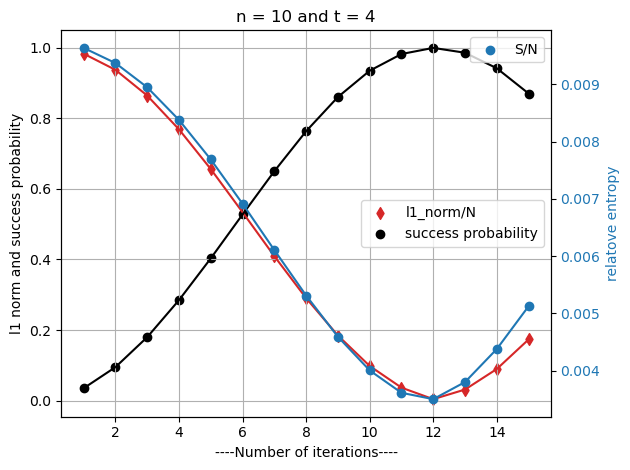

In [23]:
l1_N = [a/N for a in l1]
S_N  = [a/N for a in S]
xa   = [a+1 for a in x_axis]

print("l1 = ",l1_N)
print("S_N = ",S_N)
print("P = ",P)

fig, ax1 = pl.subplots()
pl.title("n = {} and t = {}".format(n, t))
color1 = 'tab:red'
color2 = 'black'
ax1.set_xlabel('----Number of iterations----')
ax1.scatter(xa, l1_N, marker='d', color=color1, label='l1_norm/N')
ax1.plot(xa, l1_N, color=color1)
ax1.scatter(xa, P, color=color2, label='success probability')
ax1.plot(xa, P, color=color2)
pl.legend()
ax1.set_ylabel("l1 norm and success probability")
pl.grid(True)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.scatter(xa, S_N, color=color, label='S/N')
ax2.plot(xa, S_N, color=color)
pl.legend()
ax2.set_ylabel('relatove entropy', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
#pl.grid(True)
pl.show()